In [29]:
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt

In [30]:
x_qual = np.arange(0,11,1)
x_serv = np.arange(0,11,1)
x_price = np.arange(20000,200001,1)

In [31]:
qual_buruk = fuzz.trimf(x_qual,[0,0,4])
qual_sedang = fuzz.trimf(x_qual,[3,5,7])
qual_bagus = fuzz.trimf(x_qual,[6,10,10])
serv_buruk = fuzz.trimf(x_serv,[0,0,4])
serv_sedang = fuzz.trimf(x_serv,[3,5,7])
serv_bagus = fuzz.trimf(x_serv,[6,10,10])
price_murah = fuzz.trimf(x_price,[20000,20000,80000])
price_sedang = fuzz.trimf(x_price,[60000,100000,140000])
price_mahal = fuzz.trimf(x_price,[120000,200000,200000])

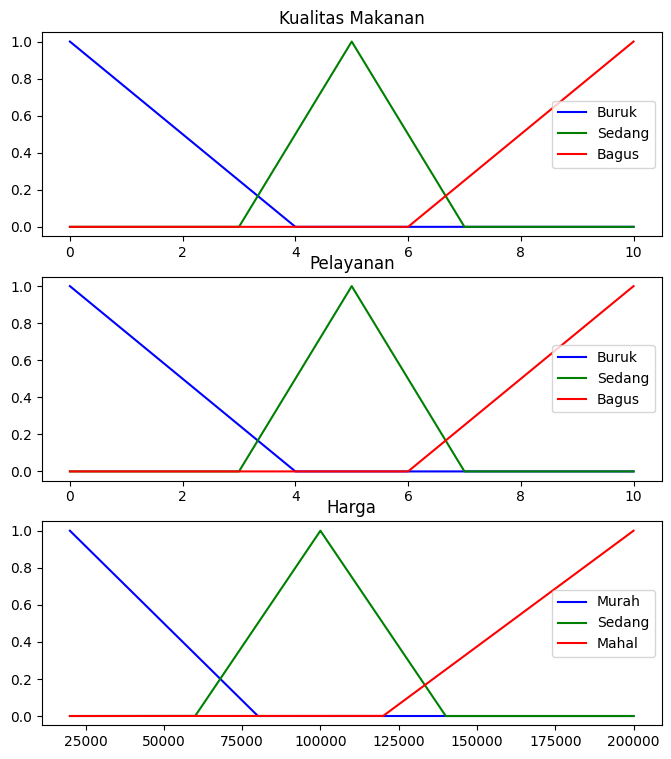

In [32]:
fig,(ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(8,9))

ax0.plot(x_qual,qual_buruk, 'b',linewidth=1.5,label = 'Buruk')
ax0.plot(x_qual,qual_sedang, 'g',linewidth=1.5,label = 'Sedang')
ax0.plot(x_qual,qual_bagus, 'r',linewidth=1.5,label = 'Bagus')
ax0.set_title('Kualitas Makanan')
ax0.legend()


ax1.plot(x_serv,serv_buruk, 'b',linewidth=1.5,label = 'Buruk')
ax1.plot(x_serv,serv_sedang, 'g',linewidth=1.5,label = 'Sedang')
ax1.plot(x_serv,serv_bagus, 'r',linewidth=1.5,label = 'Bagus')
ax1.set_title('Pelayanan')
ax1.legend()

ax2.plot(x_price,price_murah, 'b',linewidth=1.5,label = 'Murah')
ax2.plot(x_price,price_sedang, 'g',linewidth=1.5,label = 'Sedang')
ax2.plot(x_price,price_mahal, 'r',linewidth=1.5,label = 'Mahal')
ax2.set_title('Harga')
ax2.legend()


In [33]:
x_sat =np.arange(0,101,1)

In [34]:
satis_rendah = fuzz.trimf(x_sat,[0,0,40])
satis_sedang = fuzz.trimf(x_sat,[30,50,70])
satis_tinggi = fuzz.trimf(x_sat,[60,100,100])

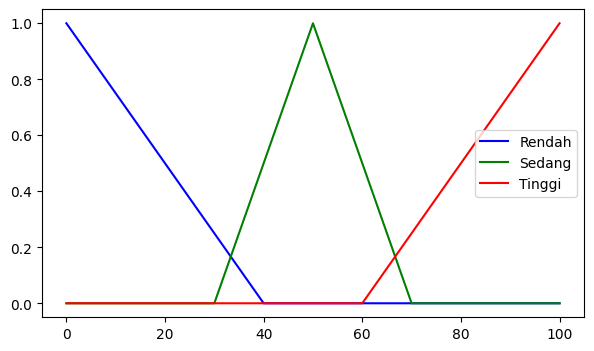

In [35]:
fig,ax = plt.subplots(nrows=1,figsize=(7,4))

ax.plot(x_sat,satis_rendah,'b',linewidth = 1.5,label='Rendah')
ax.plot(x_sat,satis_sedang,'g',linewidth = 1.5,label='Sedang')
ax.plot(x_sat,satis_tinggi,'r',linewidth = 1.5,label='Tinggi')
ax.legend()


## Mamdani

Basis aturan :

1. Jika Kualitas Bagus dan Pelayanan Bagus dan Harga Murah → Kepuasan Tinggi.

2. Jika Kualitas Bagus dan Pelayanan Bagus dan Harga Sedang → Kepuasan Tinggi.

3. Jika Kualitas Bagus tetapi Harga Mahal → Kepuasan Sedang.

4. Jika Kualitas Sedang dan Pelayanan Bagus dan Harga Murah → Kepuasan Tinggi.

5. Jika Kualitas Sedang dan Pelayanan Sedang dan Harga Sedang → Kepuasan Sedang.

6. Jika Kualitas Buruk dan Pelayanan Buruk → Kepuasan Rendah.

7. Jika Kualitas Buruk dan Pelayanan Bagus maka → Kepuasan Sedang.

8. Jika Harga Mahal dan (Kualitas Sedang atau Buruk) → Kepuasan Rendah.

9. Jika Pelayanan Buruk tetapi Kualitas Bagus → Kepuasan Sedang.

10. Jika Kualitas Bagus dan Harga Murah tetapi Pelayanan Sedang → Kepuasan Tinggi.

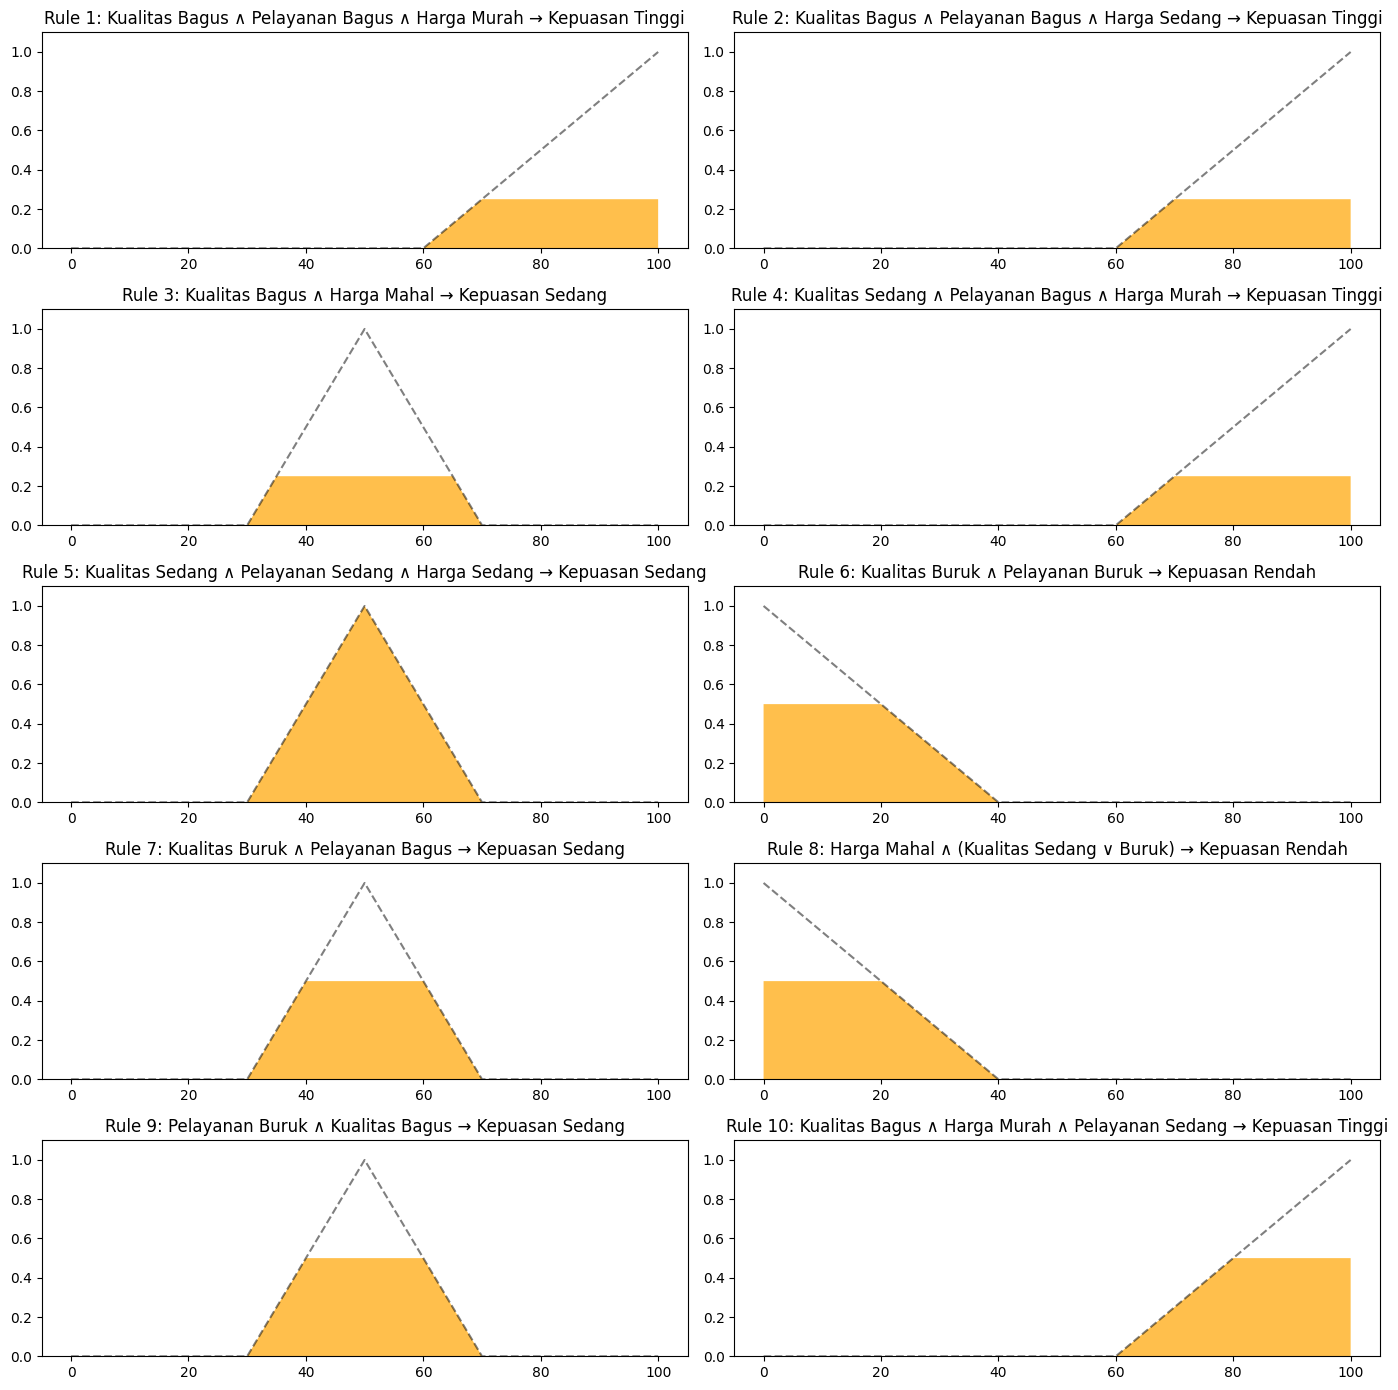

In [36]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Variabel semesta
x_qual = np.arange(0,11,1)
x_serv = np.arange(0,11,1)
x_price = np.arange(20000,200001,1)
x_sat = np.arange(0,101,1)

# Fungsi keanggotaan kualitas
qual_buruk = fuzz.trimf(x_qual,[0,0,4])
qual_sedang = fuzz.trimf(x_qual,[3,5,7])
qual_bagus = fuzz.trimf(x_qual,[6,10,10])

# Fungsi keanggotaan pelayanan
serv_buruk = fuzz.trimf(x_serv,[0,0,4])
serv_sedang = fuzz.trimf(x_serv,[3,5,7])
serv_bagus = fuzz.trimf(x_serv,[6,10,10])

# Fungsi keanggotaan harga
price_murah = fuzz.trimf(x_price,[20000,20000,80000])
price_sedang = fuzz.trimf(x_price,[60000,100000,140000])
price_mahal = fuzz.trimf(x_price,[120000,200000,200000])

# Fungsi keanggotaan kepuasan
satis_rendah = fuzz.trimf(x_sat,[0,0,40])
satis_sedang = fuzz.trimf(x_sat,[30,50,70])
satis_tinggi = fuzz.trimf(x_sat,[60,100,100])

# Fungsi pembantu untuk firing strength
def fire_and_plot(rule_no, alpha, konsekuen, title, ax):
    activation = np.fmin(alpha, konsekuen)
    ax.fill_between(x_sat, np.zeros_like(x_sat), activation, facecolor="orange", alpha=0.7)
    ax.plot(x_sat, konsekuen, 'k--', alpha=0.5)
    ax.set_title(f"Rule {rule_no}: {title}")
    ax.set_ylim(0,1.1)

def plot_all_rules():
    fig, axes = plt.subplots(5, 2, figsize=(14,14))
    axes = axes.flatten()

    # Rule 1
    alpha1 = np.fmin(qual_bagus[7], np.fmin(serv_bagus[7], price_murah[30000-20000]))
    fire_and_plot(1, alpha1, satis_tinggi,
                  "Kualitas Bagus ∧ Pelayanan Bagus ∧ Harga Murah → Kepuasan Tinggi", axes[0])

    # Rule 2
    alpha2 = np.fmin(qual_bagus[7], np.fmin(serv_bagus[7], price_sedang[100000-20000]))
    fire_and_plot(2, alpha2, satis_tinggi,
                  "Kualitas Bagus ∧ Pelayanan Bagus ∧ Harga Sedang → Kepuasan Tinggi", axes[1])

    # Rule 3
    alpha3 = np.fmin(qual_bagus[7], price_mahal[150000-20000])
    fire_and_plot(3, alpha3, satis_sedang,
                  "Kualitas Bagus ∧ Harga Mahal → Kepuasan Sedang", axes[2])

    # Rule 4
    alpha4 = np.fmin(qual_sedang[5], np.fmin(serv_bagus[7], price_murah[30000-20000]))
    fire_and_plot(4, alpha4, satis_tinggi,
                  "Kualitas Sedang ∧ Pelayanan Bagus ∧ Harga Murah → Kepuasan Tinggi", axes[3])

    # Rule 5
    alpha5 = np.fmin(qual_sedang[5], np.fmin(serv_sedang[5], price_sedang[100000-20000]))
    fire_and_plot(5, alpha5, satis_sedang,
                  "Kualitas Sedang ∧ Pelayanan Sedang ∧ Harga Sedang → Kepuasan Sedang", axes[4])

    # Rule 6
    alpha6 = np.fmin(qual_buruk[2], serv_buruk[2])
    fire_and_plot(6, alpha6, satis_rendah,
                  "Kualitas Buruk ∧ Pelayanan Buruk → Kepuasan Rendah", axes[5])

    # Rule 7
    alpha7 = np.fmin(qual_buruk[2], serv_bagus[8])
    fire_and_plot(7, alpha7, satis_sedang,
                  "Kualitas Buruk ∧ Pelayanan Bagus → Kepuasan Sedang", axes[6])

    # Rule 8
    alpha8 = np.fmin(price_mahal[160000-20000], np.fmax(qual_sedang[5], qual_buruk[2]))
    fire_and_plot(8, alpha8, satis_rendah,
                  "Harga Mahal ∧ (Kualitas Sedang ∨ Buruk) → Kepuasan Rendah", axes[7])

    # Rule 9
    alpha9 = np.fmin(serv_buruk[2], qual_bagus[8])
    fire_and_plot(9, alpha9, satis_sedang,
                  "Pelayanan Buruk ∧ Kualitas Bagus → Kepuasan Sedang", axes[8])

    # Rule 10
    alpha10 = np.fmin(qual_bagus[8], np.fmin(price_murah[30000-20000], serv_sedang[5]))
    fire_and_plot(10, alpha10, satis_tinggi,
                  "Kualitas Bagus ∧ Harga Murah ∧ Pelayanan Sedang → Kepuasan Tinggi", axes[9])

    plt.tight_layout()
    plt.show()

# Jalankan visualisasi semua rule
plot_all_rules()


In [75]:
def mamdami(kualitas, pelayanan, harga):
    qual_level_buruk = fuzz.interp_membership(x_qual, qual_buruk, kualitas)
    qual_level_sedang = fuzz.interp_membership(x_qual, qual_sedang, kualitas)
    qual_level_bagus = fuzz.interp_membership(x_qual, qual_bagus, kualitas)

    serv_level_buruk = fuzz.interp_membership(x_serv, serv_buruk, pelayanan)
    serv_level_sedang = fuzz.interp_membership(x_serv, serv_sedang, pelayanan)
    serv_level_bagus = fuzz.interp_membership(x_serv, serv_bagus, pelayanan)

    price_level_murah = fuzz.interp_membership(x_price, price_murah, harga)
    price_level_sedang = fuzz.interp_membership(x_price, price_sedang, harga)
    price_level_mahal = fuzz.interp_membership(x_price, price_mahal, harga)

    # Rules
    rule1 = np.fmin(qual_level_bagus, np.fmin(serv_level_bagus, price_level_murah))
    rule2 = np.fmin(qual_level_bagus, np.fmin(serv_level_bagus, price_level_sedang))
    rule3 = np.fmin(qual_level_bagus, price_level_mahal)
    rule4 = np.fmin(qual_level_sedang, np.fmin(serv_level_bagus, price_level_murah))
    rule5 = np.fmin(qual_level_sedang, np.fmin(serv_level_sedang, price_level_sedang))
    rule6 = np.fmin(qual_level_buruk, serv_level_buruk)
    rule7 = np.fmin(qual_level_buruk, serv_level_bagus)
    rule8 = np.fmin(price_level_mahal, np.fmax(qual_level_sedang, qual_level_buruk))
    rule9 = np.fmin(serv_level_buruk, qual_level_bagus)
    rule10 = np.fmin(qual_level_bagus, np.fmin(price_level_murah, serv_level_sedang))

    # Aktivasi untuk output
    tinggi1 = np.fmin(rule1, satis_tinggi)
    tinggi2 = np.fmin(rule2, satis_tinggi)
    tinggi4 = np.fmin(rule4, satis_tinggi)
    tinggi10 = np.fmin(rule10, satis_tinggi)
    activation_tinggi = np.fmax(tinggi1, np.fmax(tinggi2, np.fmax(tinggi4, tinggi10)))

    sedang3 = np.fmin(rule3, satis_sedang)
    sedang5 = np.fmin(rule5, satis_sedang)
    sedang7 = np.fmin(rule7, satis_sedang)
    sedang9 = np.fmin(rule9, satis_sedang)
    activation_sedang = np.fmax(sedang3, np.fmax(sedang5, np.fmax(sedang7, sedang9)))

    rendah6 = np.fmin(rule6, satis_rendah)
    rendah8 = np.fmin(rule8, satis_rendah)
    activation_rendah = np.fmax(rendah6, rendah8)

    # Agregasi
    agregate = np.fmax(activation_tinggi, np.fmax(activation_rendah, activation_sedang))

    # Defuzzifikasi
    kepuasan = fuzz.defuzz(x_sat, agregate, 'centroid')
    kepuasan_activation = fuzz.interp_membership(x_sat, agregate, kepuasan)

    # Label dominan linguistik
    rendah_val = fuzz.interp_membership(x_sat, satis_rendah, kepuasan)
    sedang_val = fuzz.interp_membership(x_sat, satis_sedang, kepuasan)
    tinggi_val = fuzz.interp_membership(x_sat, satis_tinggi, kepuasan)

    labels = {"Rendah": rendah_val, "Sedang": sedang_val, "Tinggi": tinggi_val}
    label_dominan = max(labels, key=labels.get)

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(x_sat, satis_rendah, 'b', linestyle='--', alpha=0.5)
    plt.plot(x_sat, satis_sedang, 'g', linestyle='--', alpha=0.5)
    plt.plot(x_sat, satis_tinggi, 'r', linestyle='--', alpha=0.5)
    plt.fill_between(x_sat, np.zeros_like(x_sat), agregate, facecolor='orange', alpha=0.7)
    plt.plot([kepuasan, kepuasan], [0, kepuasan_activation], 'k', linewidth=2)
    plt.title(f'Output Kepuasan pelanggan (Mamdani)\nCrisp={kepuasan:.2f}%, Label={label_dominan}')
    plt.xlabel('Kepuasan (%)')
    plt.ylabel('Derajat keanggotaan')
    plt.text(kepuasan, kepuasan_activation + 0.05, f'{kepuasan:.2f}% ({label_dominan})', 
             ha='center', fontsize=10, fontweight='bold')
    plt.show()

    return kepuasan, label_dominan


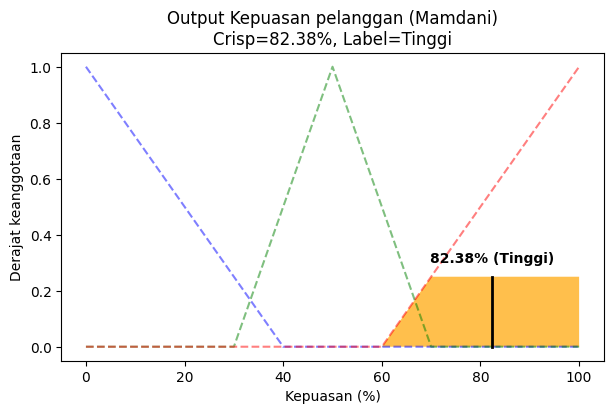

(np.float64(82.38095238095238), 'Tinggi')

In [76]:
mamdami(7,8,50000)

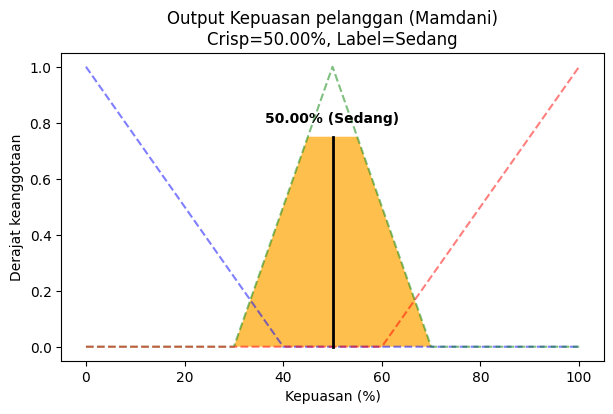

(np.float64(49.99999999999999), 'Sedang')

In [77]:
mamdami(9,5,180000)

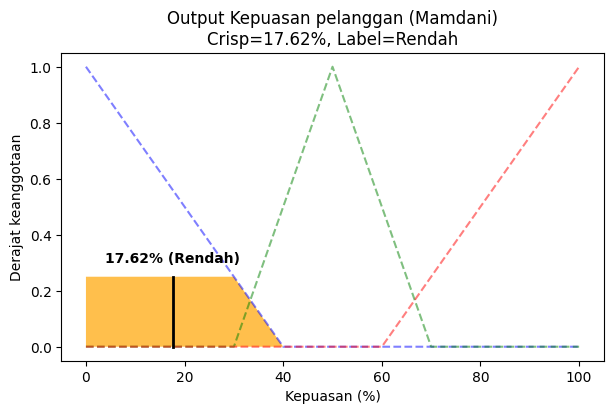

(np.float64(17.61904761904762), 'Rendah')

In [93]:
mamdami(3,2,100000)

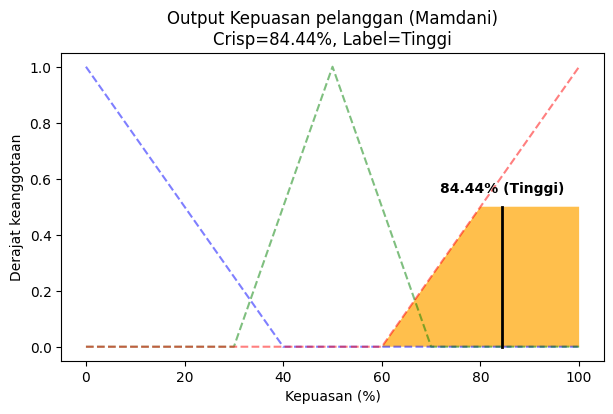

(np.float64(84.44444444444444), 'Tinggi')

In [94]:
mamdami(8,9,80000)

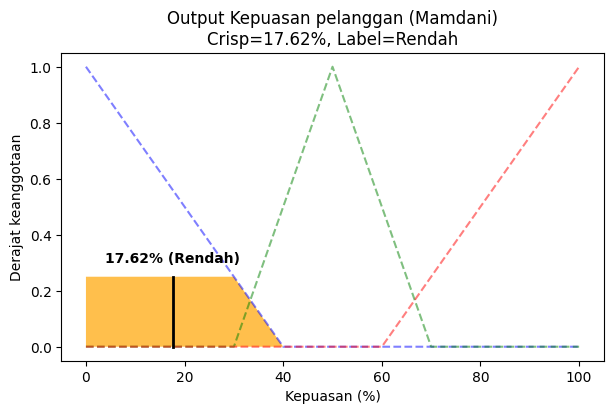

(np.float64(17.61904761904762), 'Rendah')

In [78]:
mamdami(6,7,140000)

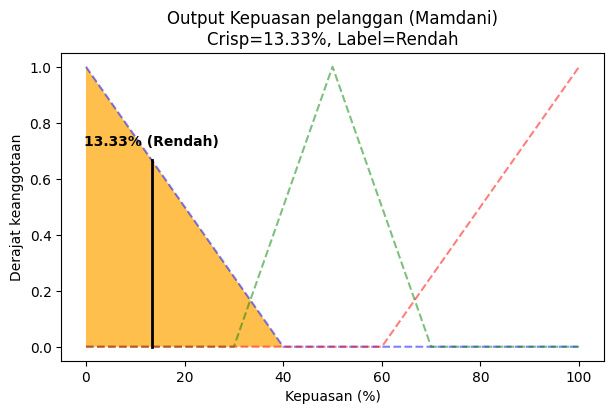

(np.float64(13.333333333333334), 'Rendah')

In [101]:
mamdami(0,0,20000)

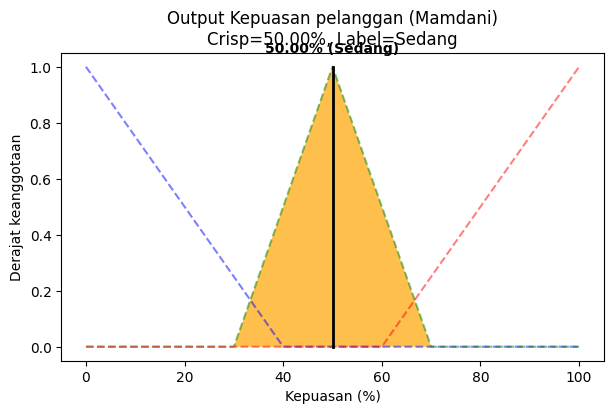

(np.float64(49.99999999999999), 'Sedang')

In [102]:
mamdami(10,10,200000)

## Sugeno

In [ ]:


def sugeno(kualitas_input, pelayanan_input, harga_input):
    
    x_qual = np.arange(0, 11, 1)  
    x_serv = np.arange(0, 11, 1)  
    x_price = np.arange(0, 200001, 1000)  
    x_sat = np.arange(0, 101, 1)

    
    qual_buruk = fuzz.trimf(x_qual, [0, 0, 5])
    qual_sedang = fuzz.trimf(x_qual, [3, 5, 7])
    qual_bagus = fuzz.trimf(x_qual, [5, 10, 10])

    
    serv_buruk = fuzz.trimf(x_serv, [0, 0, 5])
    serv_sedang = fuzz.trimf(x_serv, [3, 5, 7])
    serv_bagus = fuzz.trimf(x_serv, [5, 10, 10])

   
    price_murah = fuzz.trimf(x_price, [20000, 20000, 80000])
    price_sedang = fuzz.trimf(x_price, [60000, 100000, 140000])
    price_mahal = fuzz.trimf(x_price, [120000, 200000, 200000])

    
    satis_rendah = fuzz.trimf(x_sat, [0, 0, 50])
    satis_sedang = fuzz.trimf(x_sat, [30, 50, 70])
    satis_tinggi = fuzz.trimf(x_sat, [50, 100, 100])

    
    qual_buruk_val = fuzz.interp_membership(x_qual, qual_buruk, kualitas_input)
    qual_sedang_val = fuzz.interp_membership(x_qual, qual_sedang, kualitas_input)
    qual_bagus_val = fuzz.interp_membership(x_qual, qual_bagus, kualitas_input)

    serv_buruk_val = fuzz.interp_membership(x_serv, serv_buruk, pelayanan_input)
    serv_sedang_val = fuzz.interp_membership(x_serv, serv_sedang, pelayanan_input)
    serv_bagus_val = fuzz.interp_membership(x_serv, serv_bagus, pelayanan_input)

    price_murah_val = fuzz.interp_membership(x_price, price_murah, harga_input)
    price_sedang_val = fuzz.interp_membership(x_price, price_sedang, harga_input)
    price_mahal_val = fuzz.interp_membership(x_price, price_mahal, harga_input)

    
    rules = []
    R = 25; S = 50; T = 75 

    rules.append((min(qual_bagus_val, serv_bagus_val, price_murah_val), T, "Bagus+Bagus+Murah"))
    rules.append((min(qual_bagus_val, serv_bagus_val, price_sedang_val), T, "Bagus+Bagus+Sedang"))
    rules.append((min(qual_bagus_val, price_mahal_val), S, "Bagus+Mahal"))
    rules.append((min(qual_sedang_val, serv_bagus_val, price_murah_val), T, "Sedang+Bagus+Murah"))
    rules.append((min(qual_sedang_val, serv_sedang_val, price_sedang_val), S, "Sedang+Sedang+Sedang"))
    rules.append((min(qual_buruk_val, serv_buruk_val), R, "Buruk+Buruk"))
    rules.append((min(qual_buruk_val, serv_bagus_val), S, "Buruk+Bagus"))
    rules.append((min(price_mahal_val, max(qual_sedang_val, qual_buruk_val)), R, "Mahal+Sedang/Buruk"))
    rules.append((min(serv_buruk_val, qual_bagus_val), S, "Bagus+BurukPelayanan"))
    rules.append((min(qual_bagus_val, price_murah_val, serv_sedang_val), T, "Bagus+Murah+SedangPelayanan"))

    
    numerator = sum(alpha * z for alpha, z, _ in rules)
    denominator = sum(alpha for alpha, _, _ in rules)
    kepuasan_output = 0 if denominator == 0 else numerator / denominator

   
    rendah_val = fuzz.interp_membership(x_sat, satis_rendah, kepuasan_output)
    sedang_val = fuzz.interp_membership(x_sat, satis_sedang, kepuasan_output)
    tinggi_val = fuzz.interp_membership(x_sat, satis_tinggi, kepuasan_output)

    labels = {"Rendah": rendah_val, "Sedang": sedang_val, "Tinggi": tinggi_val}
    label_dominan = max(labels, key=labels.get)

    
    print("=== RULES AKTIF ===")
    for i, (alpha, z, desc) in enumerate(rules, 1):
        if alpha > 0:
            print(f"Rule {i}: α={alpha:.3f}, z={z}, [{desc}]")
    print(f"Hasil Defuzzifikasi Sugeno = {kepuasan_output:.2f} → Label Dominan = {label_dominan}\n")

    
    visualisasi_fungsi_keanggotaan(kepuasan_output, x_sat, satis_rendah, satis_sedang, satis_tinggi, label_dominan)

    return kepuasan_output, label_dominan


def visualisasi_fungsi_keanggotaan(kepuasan_output, x_sat, satis_rendah, satis_sedang, satis_tinggi, label_dominan):
    plt.figure(figsize=(12, 7))
    plt.plot(x_sat, satis_rendah, 'r', linewidth=2.5, label='Rendah')
    plt.plot(x_sat, satis_sedang, 'orange', linewidth=2.5, label='Sedang')
    plt.plot(x_sat, satis_tinggi, 'g', linewidth=2.5, label='Tinggi')
    plt.axvline(x=kepuasan_output, color='blue', linestyle='--',
                linewidth=2.5, alpha=0.7, label=f'Output = {kepuasan_output:.2f} ({label_dominan})')
    plt.title('Fungsi Keanggotaan Kepuasan Pelanggan (Sugeno)', fontsize=16, fontweight='bold')
    plt.xlabel('Tingkat Kepuasan')
    plt.ylabel('Derajat Keanggotaan (μ)')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.ylim([-0.05, 1.1])
    plt.xlim([-5, 105])
    plt.tight_layout()
    plt.show()


=== RULES AKTIF ===
Rule 1: α=0.400, z=75, [Bagus+Bagus+Murah]
Hasil Defuzzifikasi Sugeno = 75.00 → Label Dominan = Tinggi



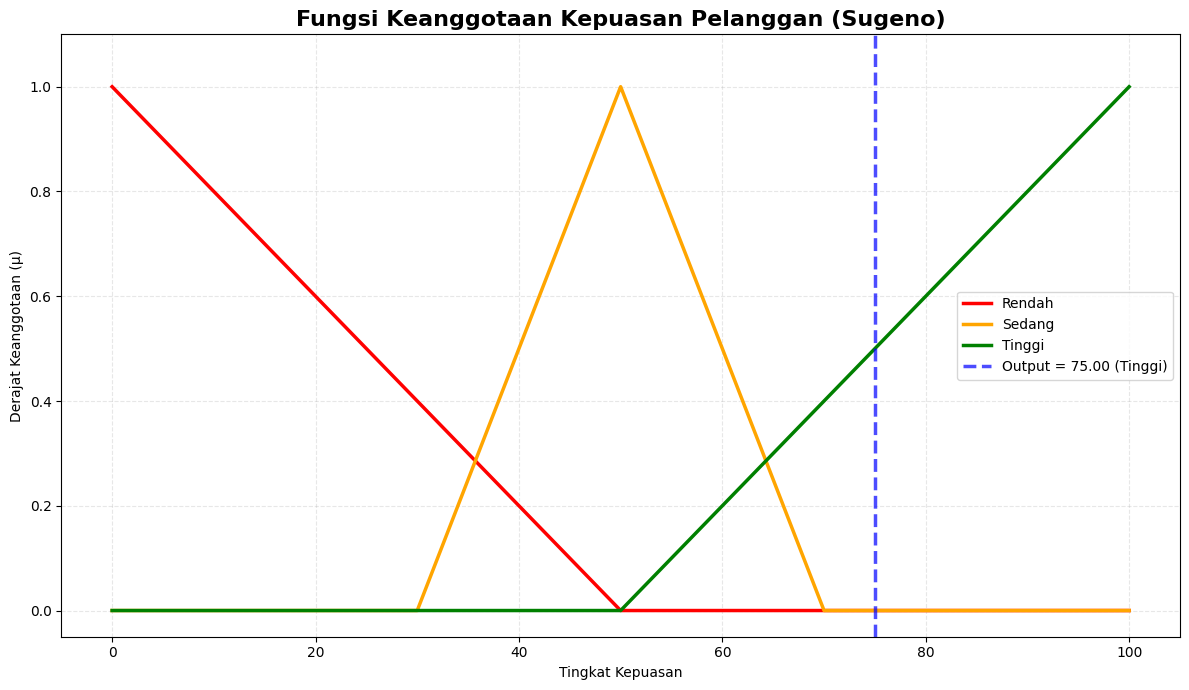

(np.float64(75.0), 'Tinggi')

In [86]:
sugeno(7,8,50000)

=== RULES AKTIF ===
Rule 3: α=0.750, z=50, [Bagus+Mahal]
Hasil Defuzzifikasi Sugeno = 50.00 → Label Dominan = Sedang



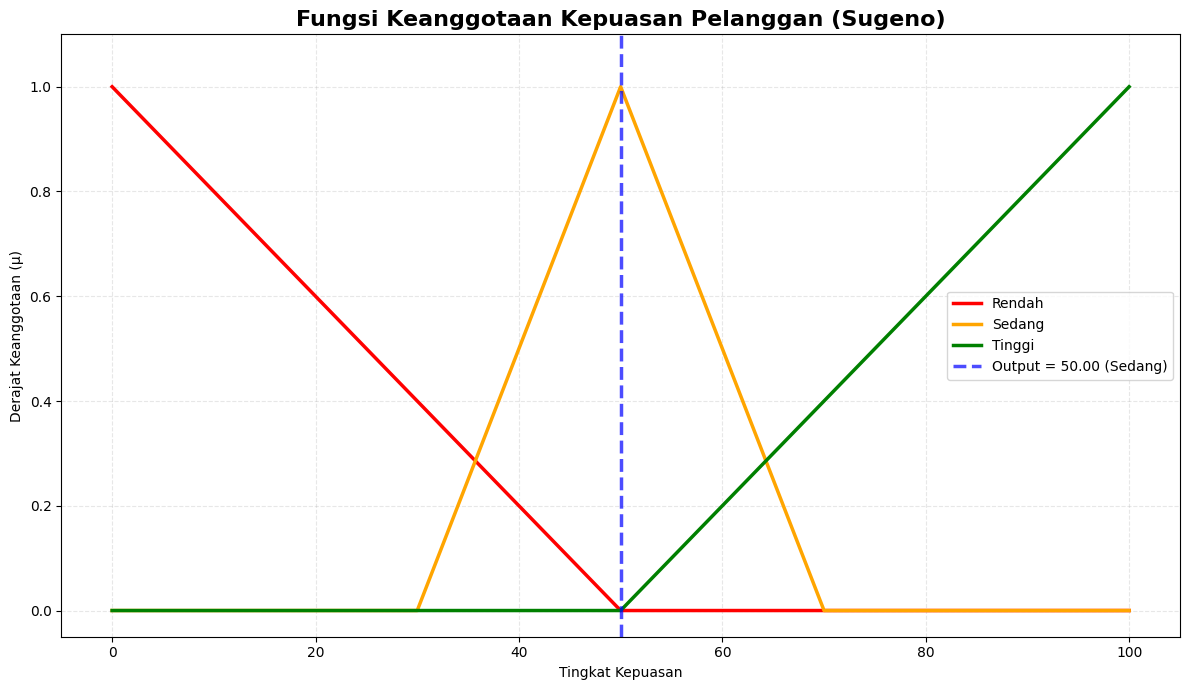

(np.float64(50.0), 'Sedang')

In [87]:
sugeno(9,5,180000)

=== RULES AKTIF ===
Rule 3: α=0.200, z=50, [Bagus+Mahal]
Rule 8: α=0.250, z=25, [Mahal+Sedang/Buruk]
Hasil Defuzzifikasi Sugeno = 36.11 → Label Dominan = Sedang



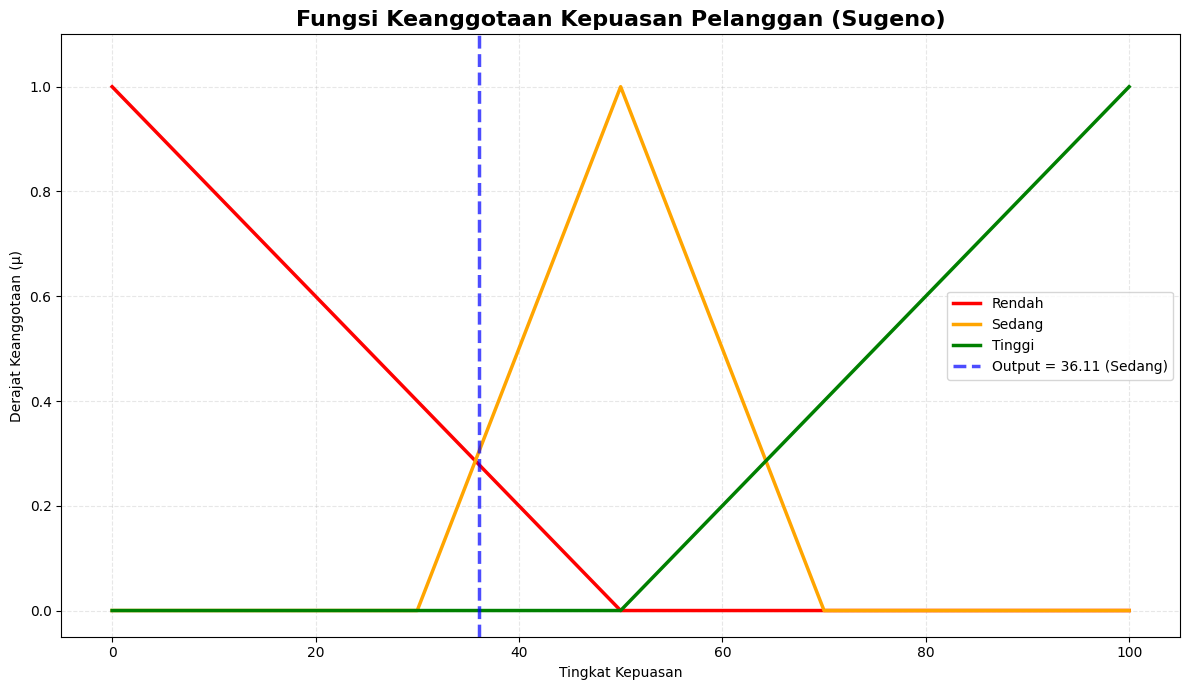

(np.float64(36.11111111111111), 'Sedang')

In [88]:
sugeno(6,7,140000)

=== RULES AKTIF ===
Rule 6: α=0.400, z=25, [Buruk+Buruk]
Hasil Defuzzifikasi Sugeno = 25.00 → Label Dominan = Rendah



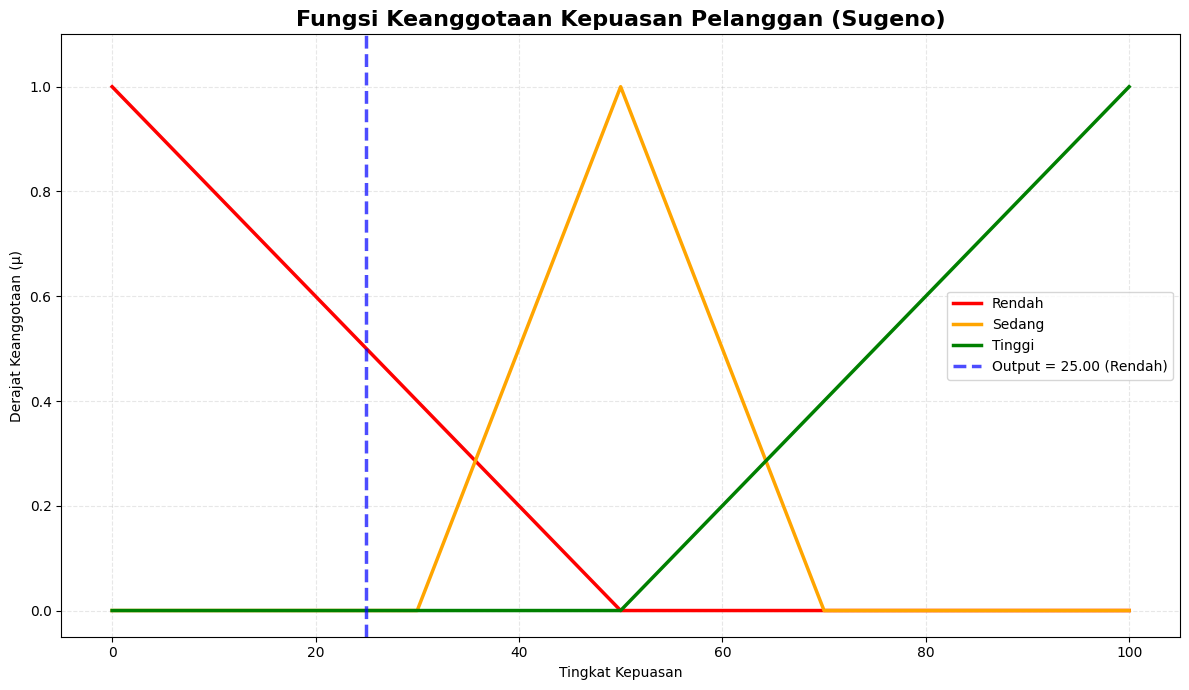

(np.float64(25.0), 'Rendah')

In [95]:
sugeno(3,2,100000)

=== RULES AKTIF ===
Rule 2: α=0.500, z=75, [Bagus+Bagus+Sedang]
Hasil Defuzzifikasi Sugeno = 75.00 → Label Dominan = Tinggi



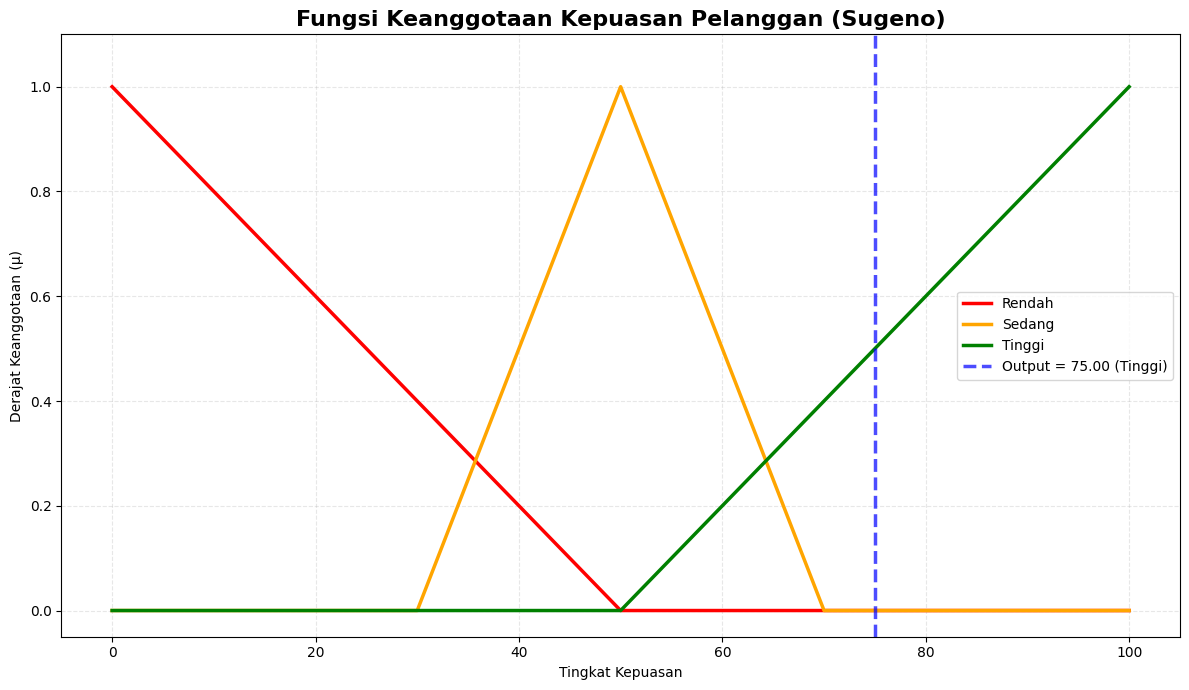

(np.float64(75.0), 'Tinggi')

In [96]:
sugeno(8,9,80000)

=== RULES AKTIF ===
Rule 6: α=1.000, z=25, [Buruk+Buruk]
Hasil Defuzzifikasi Sugeno = 25.00 → Label Dominan = Rendah



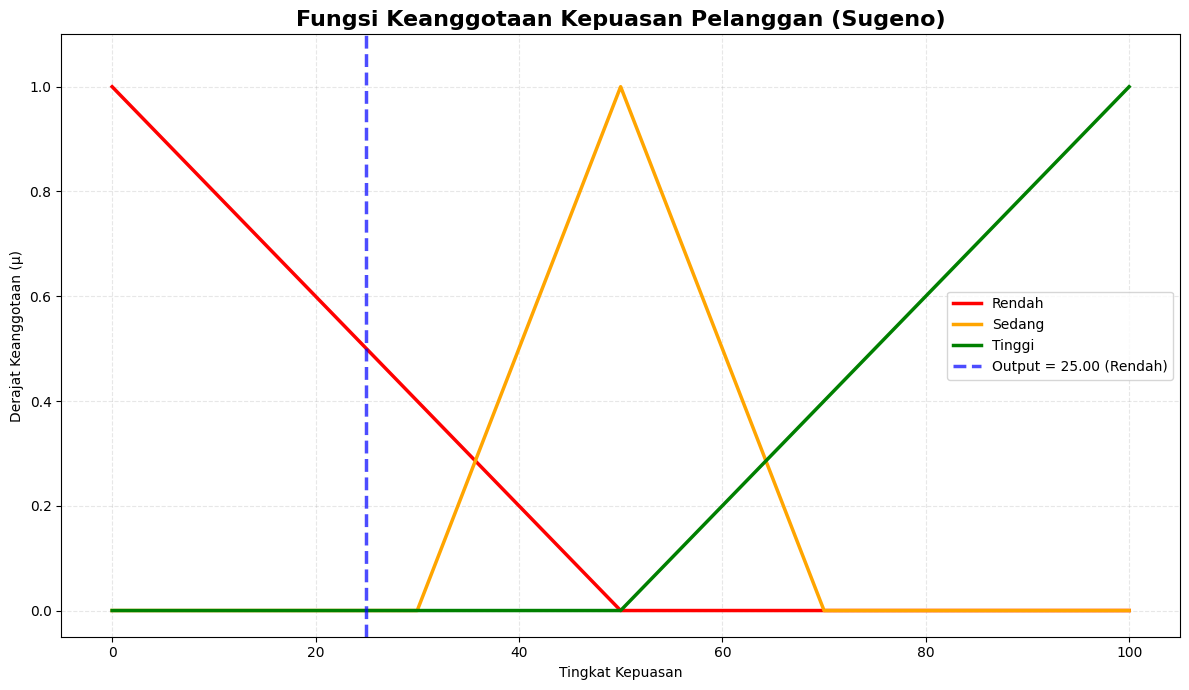

(np.float64(25.0), 'Rendah')

In [103]:
sugeno(0,0,20000)

=== RULES AKTIF ===
Rule 3: α=1.000, z=50, [Bagus+Mahal]
Hasil Defuzzifikasi Sugeno = 50.00 → Label Dominan = Sedang



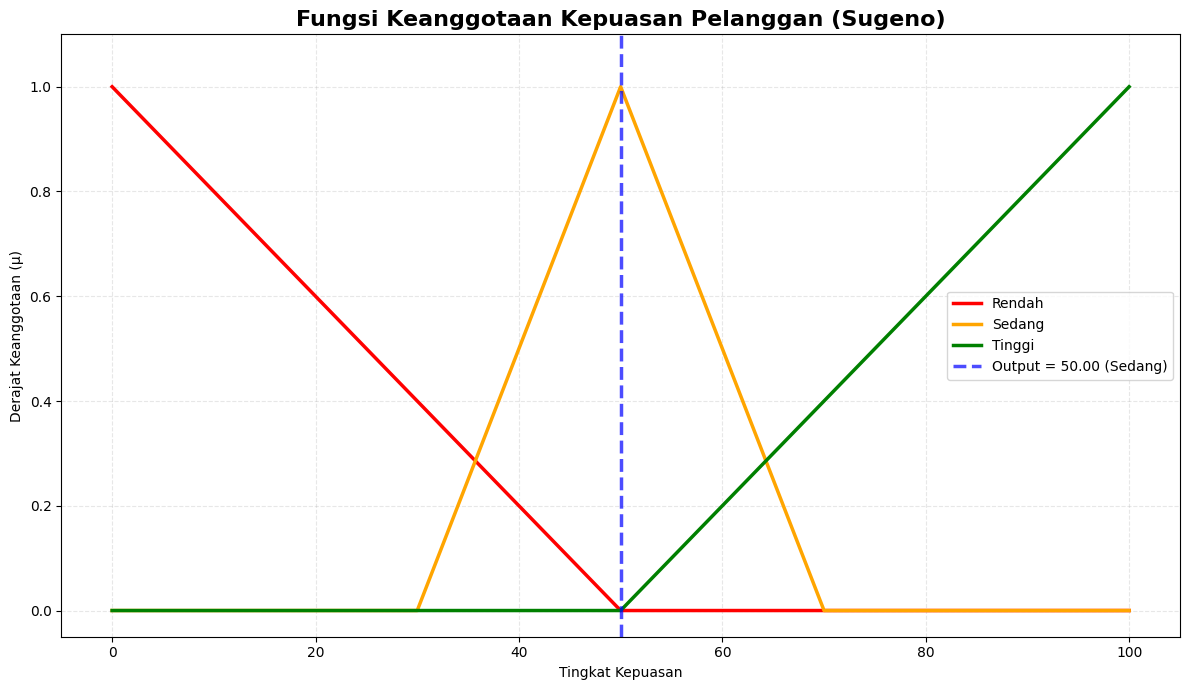

(np.float64(50.0), 'Sedang')

In [104]:
sugeno(10,10,200000)

In [ ]:


def Tsukamoto(kualitas, pelayanan, harga):
    # === FUZZIFIKASI INPUT ===
    q_b = fuzz.interp_membership(x_qual, qual_buruk, kualitas)
    q_s = fuzz.interp_membership(x_qual, qual_sedang, kualitas)
    q_g = fuzz.interp_membership(x_qual, qual_bagus, kualitas)

    s_b = fuzz.interp_membership(x_serv, serv_buruk, pelayanan)
    s_s = fuzz.interp_membership(x_serv, serv_sedang, pelayanan)
    s_g = fuzz.interp_membership(x_serv, serv_bagus, pelayanan)

    p_m = fuzz.interp_membership(x_price, price_murah, harga)
    p_s = fuzz.interp_membership(x_price, price_sedang, harga)
    p_h = fuzz.interp_membership(x_price, price_mahal, harga)

    
    alpha1  = np.fmin(q_g, np.fmin(s_g, p_m))      # Bagus+Bagus+Murah → Tinggi
    alpha2  = np.fmin(q_g, np.fmin(s_g, p_s))      # Bagus+Bagus+Sedang → Tinggi
    alpha3  = np.fmin(q_g, p_h)                    # Bagus+Mahal → Rendah
    alpha4  = np.fmin(q_s, np.fmin(s_g, p_m))      # Sedang+Bagus+Murah → Tinggi
    alpha5  = np.fmin(q_s, np.fmin(s_s, p_s))      # Sedang+Sedang+Sedang → Rendah
    alpha6  = np.fmin(q_b, s_b)                    # Buruk+Buruk → Rendah
    alpha7  = np.fmin(q_b, s_g)                    # Buruk+Bagus → Rendah
    alpha8  = np.fmin(p_h, np.fmax(q_s, q_b))      # Mahal & (Sedang/Buruk) → Rendah
    alpha9  = np.fmin(s_b, q_g)                    # Buruk+Bagus → Rendah
    alpha10 = np.fmin(q_g, np.fmin(p_m, s_s))      # Bagus+Murah+Sedang → Tinggi

    # === INVERSE MEMBERSHIP MONOTON ===
    def inv_rendah(alpha): 
        return 50 - alpha * 50 if alpha > 0 else 0
    def inv_tinggi(alpha):  
        return 50 + alpha * 50 if alpha > 0 else 0

    # === HITUNG Z UNTUK TIAP RULE ===
    z1, z2, z4, z10 = inv_tinggi(alpha1), inv_tinggi(alpha2), inv_tinggi(alpha4), inv_tinggi(alpha10)
    z3, z5, z6, z7, z8, z9 = (inv_rendah(a) for a in [alpha3, alpha5, alpha6, alpha7, alpha8, alpha9])

    # === DEFUZZIFIKASI (Weighted Average) ===
    alphas = [alpha1, alpha2, alpha4, alpha10, alpha3, alpha5, alpha6, alpha7, alpha8, alpha9]
    zs     = [z1, z2, z4, z10, z3, z5, z6, z7, z8, z9]

    num = sum(a*z for a, z in zip(alphas, zs))
    den = sum(alphas)
    kepuasan = num/den if den != 0 else 0

    # === LABEL DOMINAN ===
    rendah_val = fuzz.interp_membership(x_sat, satis_rendah, kepuasan)
    tinggi_val = fuzz.interp_membership(x_sat, satis_tinggi, kepuasan)
    label = "Rendah" if rendah_val > tinggi_val else "Tinggi"

    print(f"Hasil Crisp Kepuasan (Tsukamoto 2-label) = {kepuasan:.2f}")
    print(f"Label Dominan = {label}\n")

    # === VISUALISASI ===
    plt.figure(figsize=(7,4))
    plt.plot(x_sat, satis_rendah, 'b--', label='Rendah')
    plt.plot(x_sat, satis_tinggi, 'r--', label='Tinggi')
    plt.axvline(kepuasan, color='k', linewidth=2, label=f'Output = {kepuasan:.2f} ({label})')
    plt.title("Tsukamoto 2-label")
    plt.xlabel("Kepuasan (%)")
    plt.ylabel("Derajat Keanggotaan")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    return kepuasan, label


Hasil Crisp Kepuasan (Tsukamoto 2-label) = 62.50
Label Dominan = Tinggi



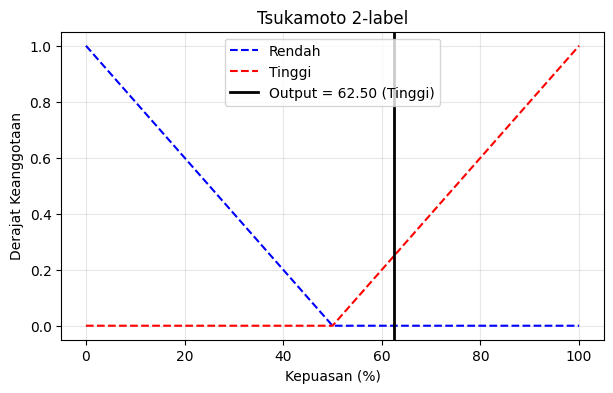

(np.float64(62.5), 'Tinggi')

In [124]:
Tsukamoto(7,8,50000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 12.50
Label Dominan = Rendah



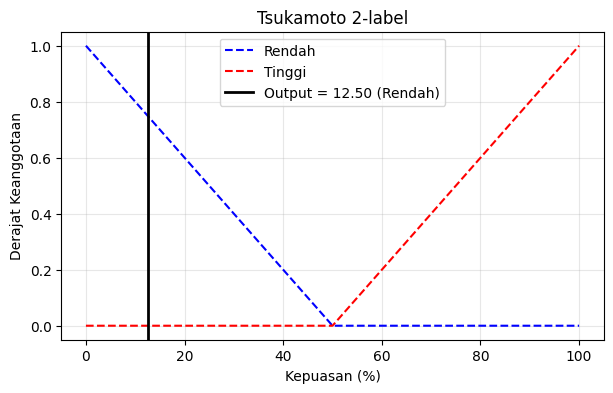

(np.float64(12.5), 'Rendah')

In [125]:
Tsukamoto(9,5,180000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 37.50
Label Dominan = Rendah



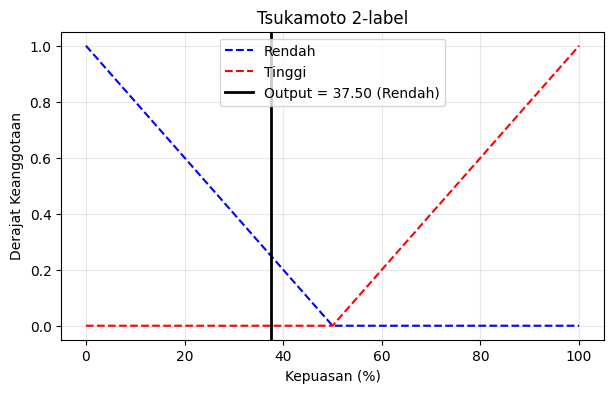

(np.float64(37.5), 'Rendah')

In [126]:
Tsukamoto(3,2,100000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 37.50
Label Dominan = Rendah



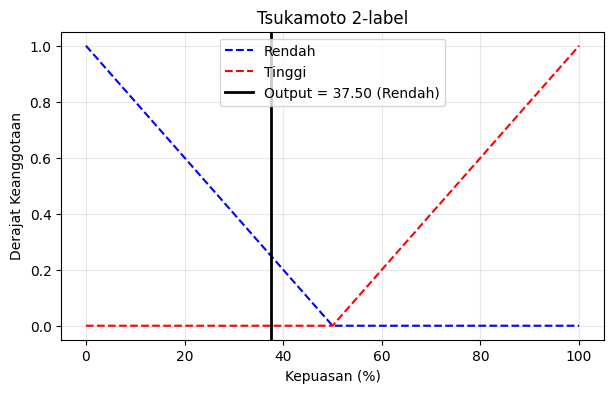

(np.float64(37.5), 'Rendah')

In [127]:
Tsukamoto(6,7,140000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 75.00
Label Dominan = Tinggi



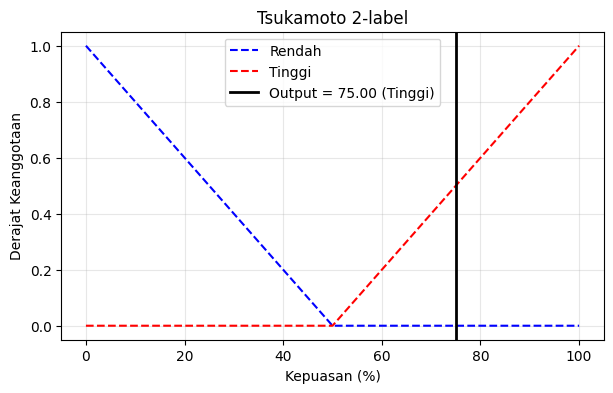

(np.float64(75.0), 'Tinggi')

In [128]:
Tsukamoto(8,9,80000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 0.00
Label Dominan = Rendah



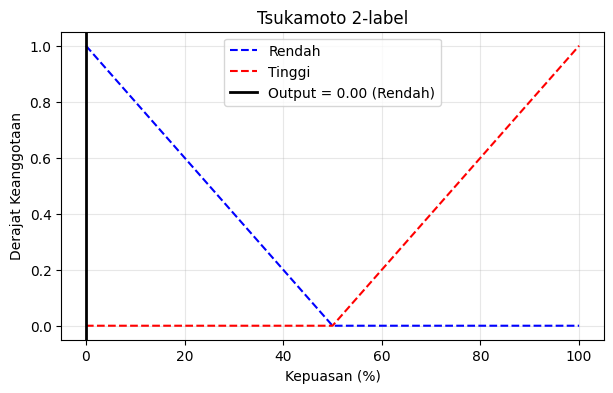

(np.float64(0.0), 'Rendah')

In [129]:
Tsukamoto(0,0,20000)

Hasil Crisp Kepuasan (Tsukamoto 2-label) = 0.00
Label Dominan = Rendah



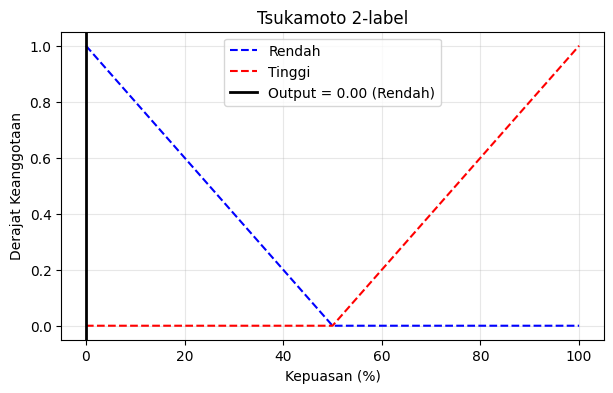

(np.float64(0.0), 'Rendah')

In [130]:
Tsukamoto(10,10,200000)